In [1]:
import os
os.environ.setdefault("TF_CPP_MIN_LOG_LEVEL", "2")  # Report only TF errors by default
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dataset import Dataset
from pipeline import Pipeline
from visualizations import Visualizer
from sklearn.linear_model import Ridge
import sklearn.preprocessing
from sklearn.svm import LinearSVR, SVR
from sklearn.decomposition import PCA, KernelPCA
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import mean_squared_error
from sktime.performance_metrics.forecasting import mean_squared_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError
rmse = MeanSquaredError(square_root = True)
from scipy.linalg import LinAlgWarning
import sklearn.model_selection
import warnings
# Filter out LinAlgWarning
warnings.filterwarnings("ignore", category=LinAlgWarning)
#controling whether tensorflow does recognize GPU
tf.config.get_visible_devices("GPU")
np.random.seed(42)

In [2]:
#Inititate processing pipeline
pipeline = Pipeline(crypto_tick = "btc")
#Initiate visualizer
visualizer = Visualizer()

In [3]:
print("Missing values distribution:")
visualizer.get_missing_columns(data = pipeline.data)

Missing values distribution:


{'BTC / Capitalization, market, estimated supply, USD': [3092, '% 70.594'],
 'BTC / Volatility, daily returns, 180d': [11, '% 0.251'],
 'Wiki_btc_search': [1640, '% 37.443'],
 'Close_^DJI': [1360, '% 31.05'],
 'Close_^GSPC': [1360, '% 31.05'],
 'Close_GC=F': [1363, '% 31.119'],
 'Close_^VIX': [1360, '% 31.05'],
 'Close_^IXIC': [1360, '% 31.05'],
 'Close_SMH': [1360, '% 31.05'],
 'Close_VGT': [1360, '% 31.05'],
 'Close_XSD': [1360, '% 31.05'],
 'Close_IYW': [1360, '% 31.05'],
 'Close_FTEC': [2067, '% 47.192'],
 'Close_IGV': [1360, '% 31.05'],
 'Close_QQQ': [1360, '% 31.05'],
 'Wiki_crypto_search': [1640, '% 37.443'],
 'USD_EUR_rate': [161, '% 3.676'],
 'BTC-USD': [1353, '% 30.89']}

/tmp/ipykernel_123434/523243249.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


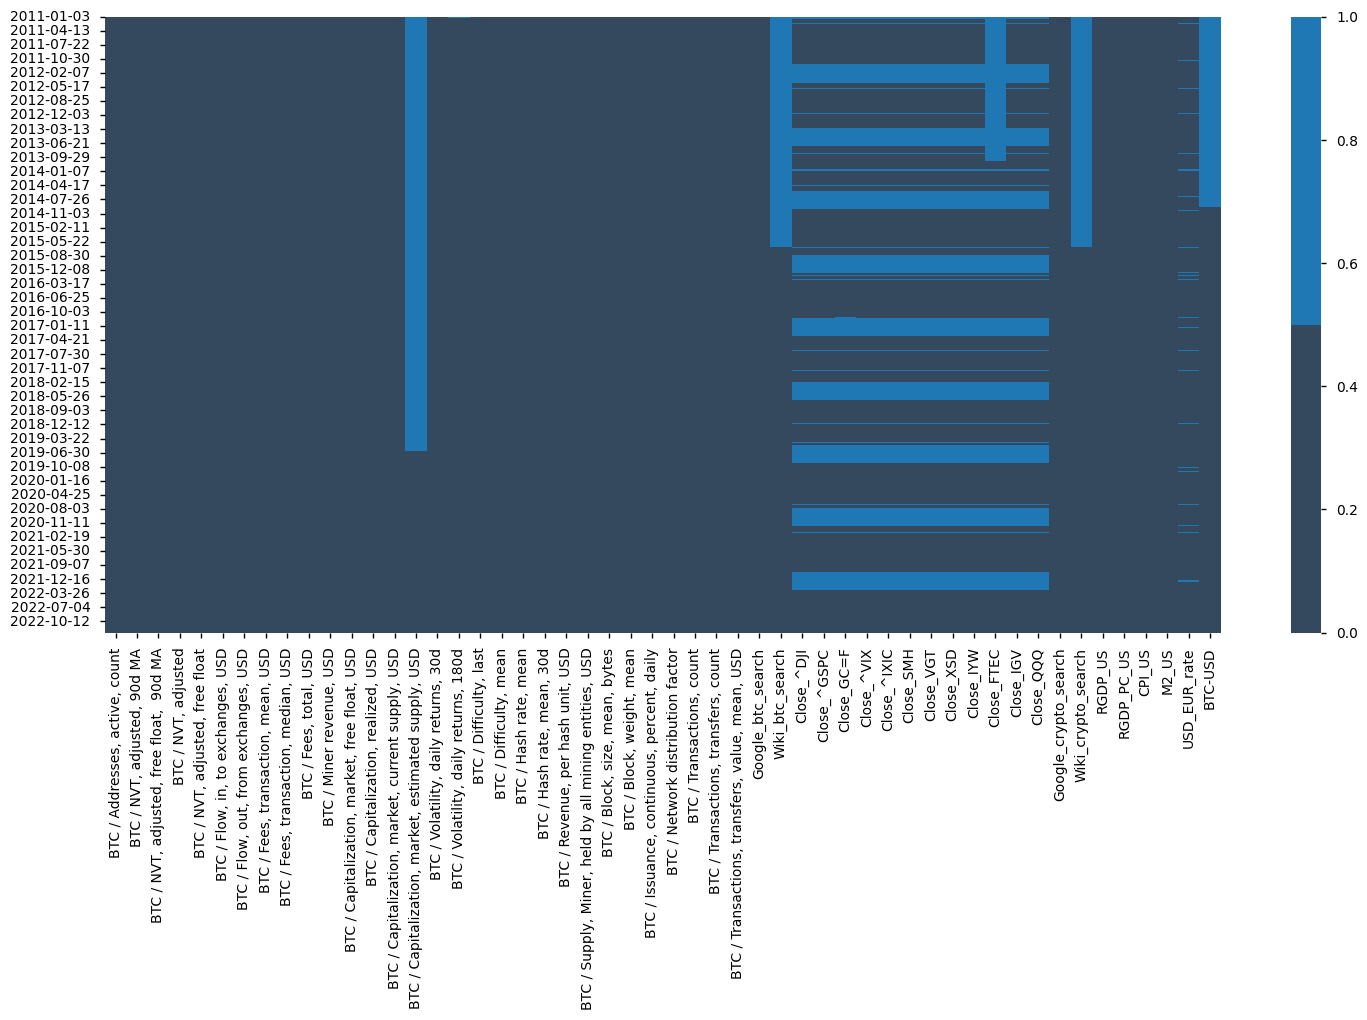

In [4]:
fig = visualizer.draw_missing_data(data = pipeline.data)
fig.show()

In [5]:
pipeline.set_beginning(start_date = "2014-9-17")

/tmp/ipykernel_123434/523243249.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


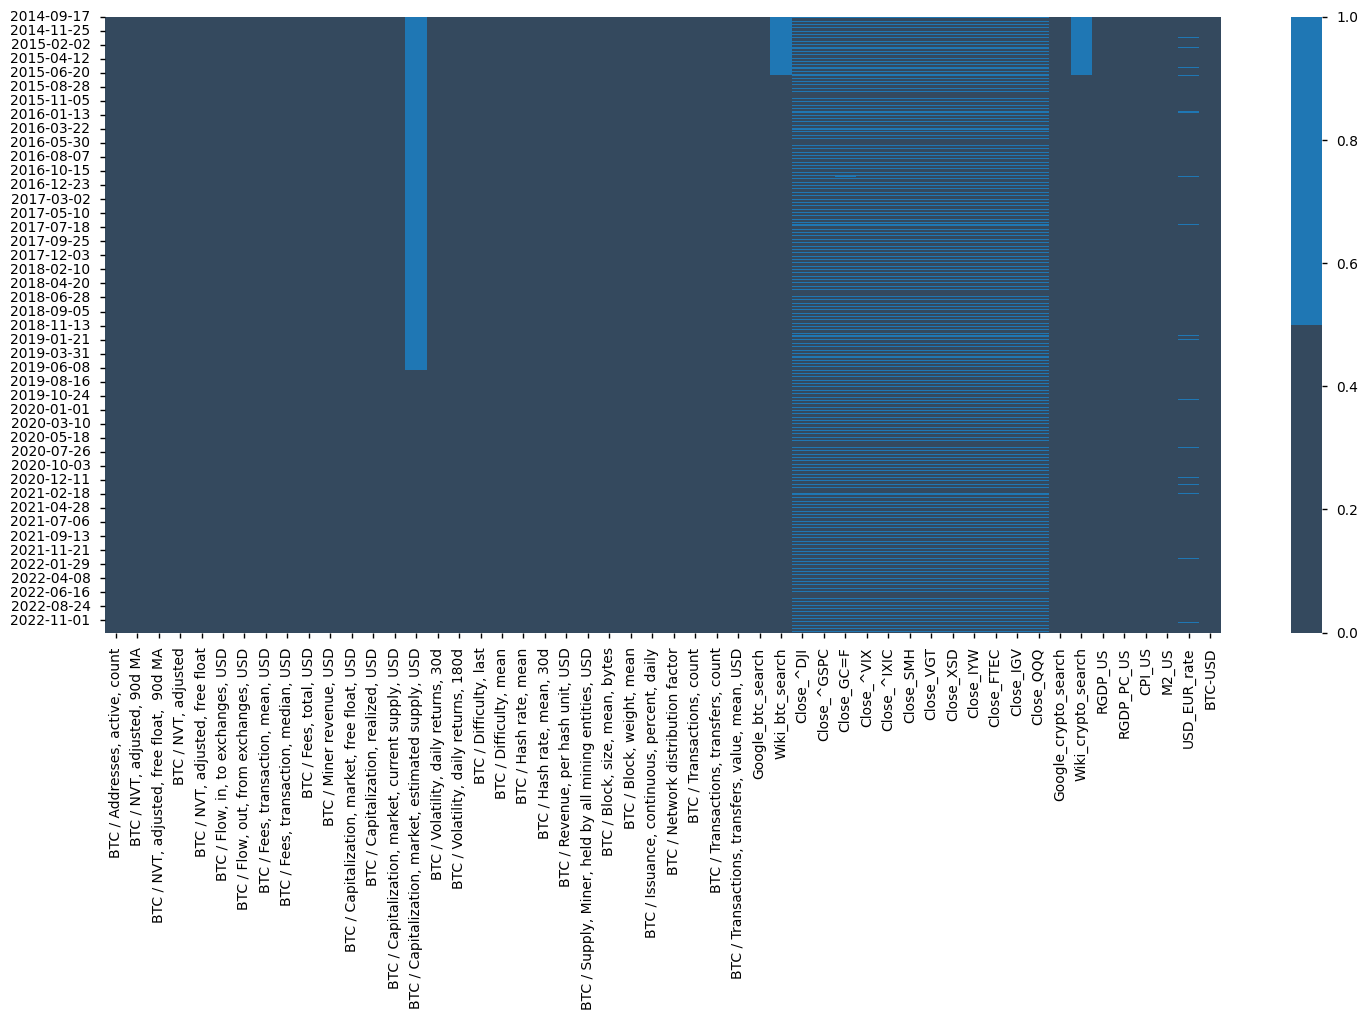

In [6]:
fig = visualizer.draw_missing_data(data = pipeline.data)
fig.show()

In [7]:
pipeline.preprocess_dataset()

/tmp/ipykernel_123434/523243249.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


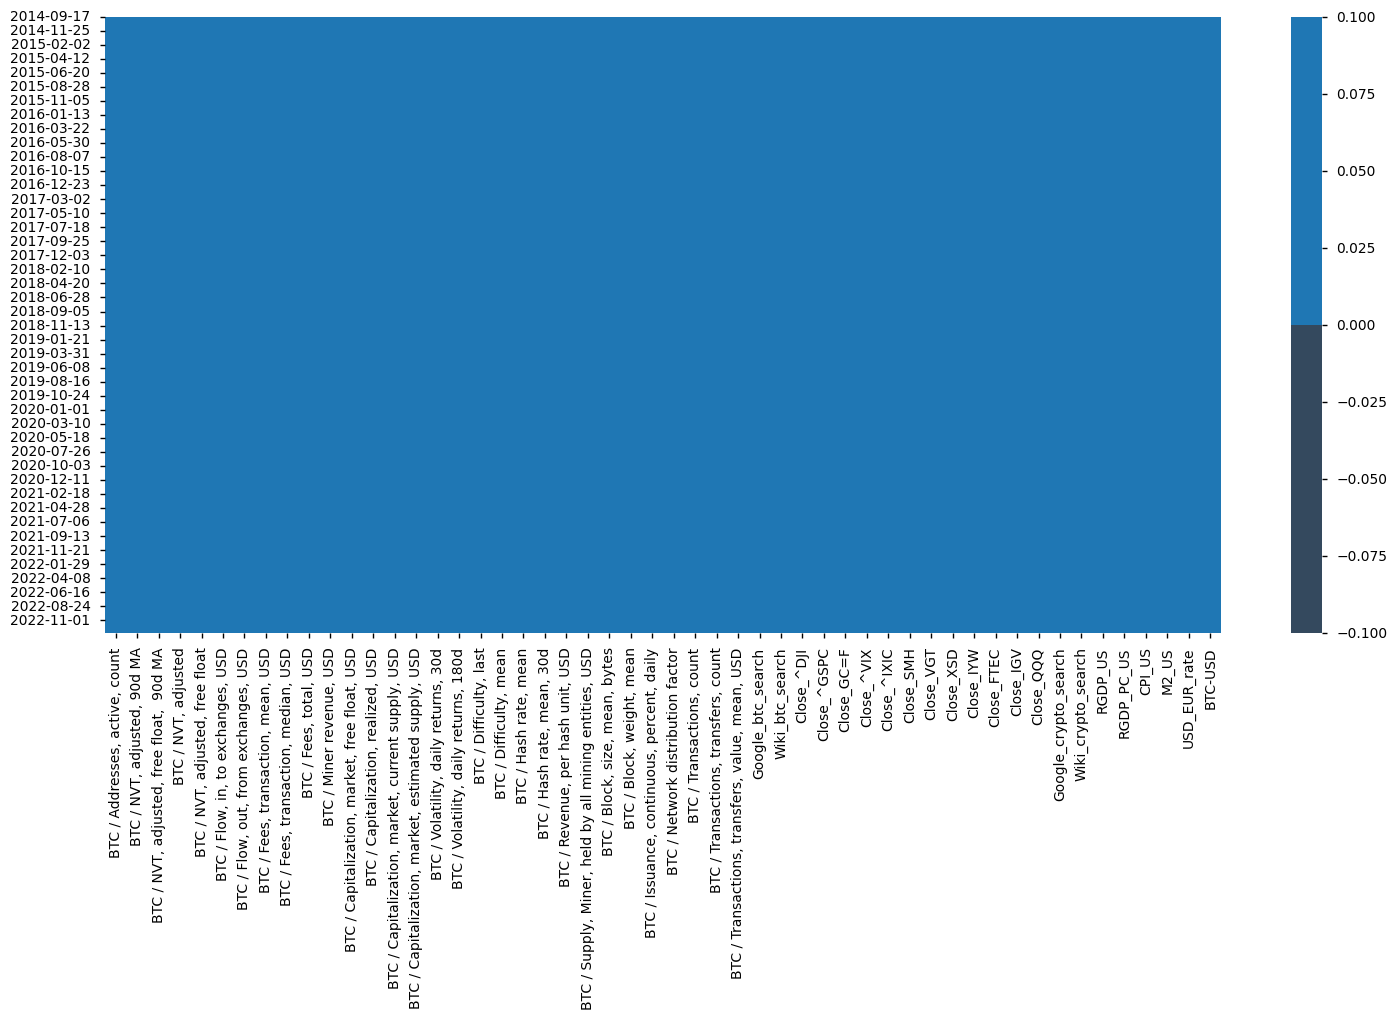

In [8]:
fig = visualizer.draw_missing_data(data = pipeline.data)
fig.show()

In [9]:
pipeline.shift_target()

In [10]:
columns = ["BTC-LR - 1 day", "BTC-LR - 5 days", 
           "BTC-LR - 10 days", "BTC-SVR - 1 day", "BTC-SVR - 5 days", 
           "BTC-SVR - 10 days", "BTC-LSTM - 1 day", "BTC-LSTM - 5 days","BTC-LSTM - 10 days"]
rows = ["Full dimensionality", "95% retained variance",
        "98% retained variance", "99% retained variance"]
#presented in RMSE which is the optimized metric
results_train_averaged = pd.DataFrame(columns = columns, index = rows)

In [11]:
columns = ["BTC-LR - 1 day", "BTC-LR - 5 days", 
           "BTC-LR - 10 days", "BTC-SVR - 1 day", "BTC-SVR - 5 days", "BTC-SVR - 10 days", 
           "BTC-LSTM - 1 day", "BTC-LSTM - 5 days","BTC-LSTM - 10 days"]
rows = ["Full dimensionality", "95% retained variance",
        "98% retained variance", "99% retained variance"]
#presented in RMSE which is the optimized metric
results_test = pd.DataFrame(columns = columns, index = rows)

# PCA retained variance on the whole dataset

0.5252969483552663


/tmp/ipykernel_123434/2018063168.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


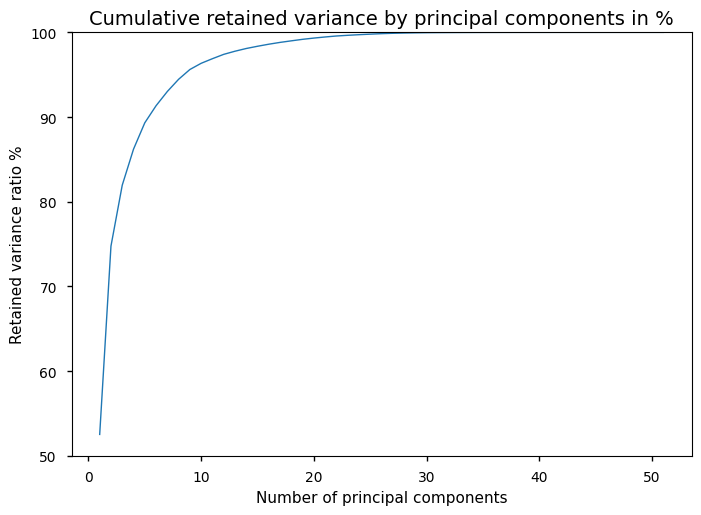

In [12]:
pca = PCA(random_state = 42)
scaler = sklearn.preprocessing.RobustScaler(unit_variance = True)
pca.fit_transform(scaler.fit_transform(pipeline.data_1d_shift.copy().iloc[:,:-1]))
fig = visualizer.draw_cumulative_varience_ratios(np.cumsum(pca.explained_variance_ratio_))
fig.show()

In [13]:
print("Explained variance by component")
pca.explained_variance_ratio_

Explained variance by component


array([5.25296948e-01, 2.22391503e-01, 7.18862530e-02, 4.25186070e-02,
       3.11269689e-02, 2.01588783e-02, 1.68017113e-02, 1.44066326e-02,
       1.15607263e-02, 7.32187191e-03, 5.44279208e-03, 5.11367424e-03,
       3.70262639e-03, 3.22104620e-03, 2.63523406e-03, 2.42891684e-03,
       2.13671352e-03, 1.84934958e-03, 1.77680317e-03, 1.47859369e-03,
       1.29846343e-03, 1.16067207e-03, 8.05112818e-04, 7.24467065e-04,
       6.36030108e-04, 5.85959501e-04, 4.38169700e-04, 3.09974153e-04,
       2.45478859e-04, 1.75003072e-04, 9.53806395e-05, 6.32641907e-05,
       5.52300035e-05, 4.08115204e-05, 3.56686179e-05, 2.26548332e-05,
       1.59496890e-05, 1.06853266e-05, 8.89948275e-06, 4.56631271e-06,
       3.90608578e-06, 3.11263247e-06, 1.48399354e-06, 1.05976716e-06,
       7.70406814e-07, 5.56628567e-07, 3.13225265e-07, 2.66915632e-07,
       1.45116311e-07, 5.99431774e-08, 3.36524206e-08])

# Full dimensionality - baseline models

The pipeline is always shown for 1 day forecasting. 5 and 10 day forecasting is performed without further comments 

## Full dimensionality - Linear Regression

In [14]:
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = None)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', None), ('scaler 2', None), ('pack_up,', None),
                ('estimator', Ridge(random_state=42))])

In [15]:
LR_PARAMETERS = {"estimator__alpha": np.linspace(0,5,20),
              "estimator__tol":[0.0001, 0.0005,0.001],
              "estimator__max_iter":[200,500,1000,2000]}
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["BTC-LR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-LR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.54359e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.54359e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.54359e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.54359e-27): r

## Full dimensionality - 5 and 10 days - LR

In [16]:
#5 days LR
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = None)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["BTC-LR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-LR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days LR
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = None)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["BTC-LR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-LR - 10 days"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.64432e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.64432e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.64432e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.64432e-27): r

## Full dimensionality - Support Vector Regression

In [17]:
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = None)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', None), ('scaler 2', None), ('pack_up,', None),
                ('estimator', LinearSVR(random_state=42))])

In [18]:
SVR_PARAMETERS = {"estimator__C": np.logspace(-10,5,10),
    "estimator__epsilon": [1, 2, 3, 3.5, 4, 4.5, 5],
              "estimator__tol":[0.0001, 0.0005,0.001],
              "estimator__max_iter":[200,500,1000,2000]}
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["BTC-SVR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-SVR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

In [19]:
print(model.best_params_)
print(model.best_estimator_)
print(model.best_score_)

{'estimator__C': 2154.4346900318865, 'estimator__epsilon': 1, 'estimator__max_iter': 200, 'estimator__tol': 0.0001}
Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', None), ('scaler 2', None), ('pack_up,', None),
                ('estimator',
                 LinearSVR(C=2154.4346900318865, epsilon=1, max_iter=200,
                           random_state=42))])
-931.0464978910293


## Full dimensionality - 5 and 10 days - SVR

In [20]:
#5 days SVR
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = None)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["BTC-SVR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-SVR - 5 days"]] = rmse(test_target,
                                                                prediction)

#10 days SVR
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = None)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["BTC-SVR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-SVR - 10 days"]] = rmse(test_target,
                                                                prediction)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

/tmp/ipykernel_123434/2488864839.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


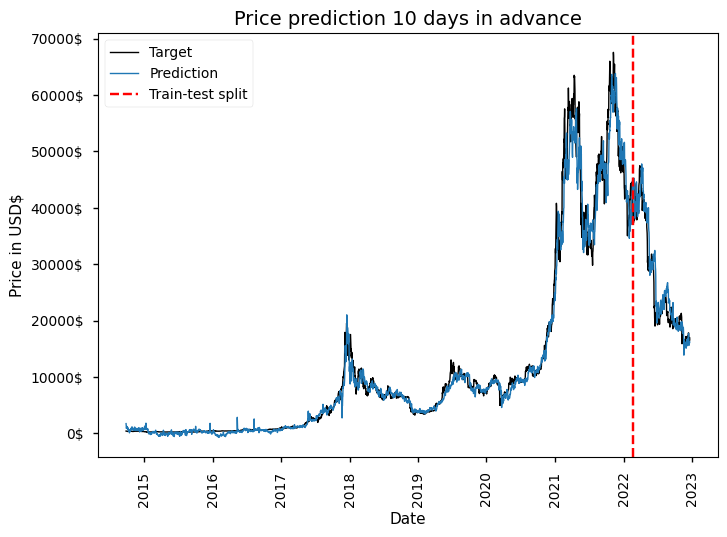

In [21]:
test_prediction = pd.Series(prediction, index=test_data.index)
train_pred = pd.Series(model.predict(train_data), index=train_data.index)
visualizer = Visualizer()
fig = visualizer.draw_prediction_full(train_target,train_pred, test_target, test_prediction, 10)
fig.show()

/tmp/ipykernel_123434/4071368209.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


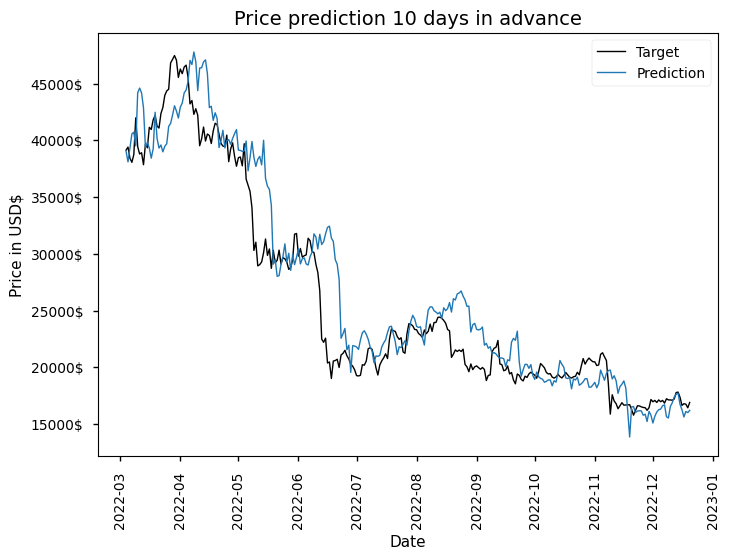

In [22]:
fig = visualizer.draw_prediction_test(test_target, test_prediction, 10)
fig.show()

## Full dimensionality - LTSM


In [23]:
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = None, shape_change = ((-1, 52), (-1,1,52)))
pipe

Pipeline(steps=[('pack_down', ReshapeTransformer(new_shape=(-1, 52))),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', None), ('scaler 2', None),
                ('pack_up,', ReshapeTransformer(new_shape=(-1, 1, 52))),
                ('estimator',
                 KerasRegressor(batch_size=70, build_fn=<function Pipeline.assembly_lstm at 0x7fd6af115260>, epochs=500, input_shape=(1, 52), random_state=42, shuffle=False, units=2000, verbose=0))])

In [24]:
LSTM_PARAMETERS = {"estimator__units": [300],
    "estimator__epochs": [50]}
x,y = Pipeline.create_lstm_input(pipeline.data_1d_shift.copy(), pipeline.data_1d_shift.copy().iloc[:,-1], 1)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
#TODO: fix scaling target sequentially (seperately for both splits)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["Full dimensionality"],["BTC-LSTM - 1 day"]] = rmse(minimax.inverse_transform(train_target.reshape(-1,1)), minimax.inverse_transform(model.predict(train_data).reshape(-1,1)))
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-LSTM - 1 day"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


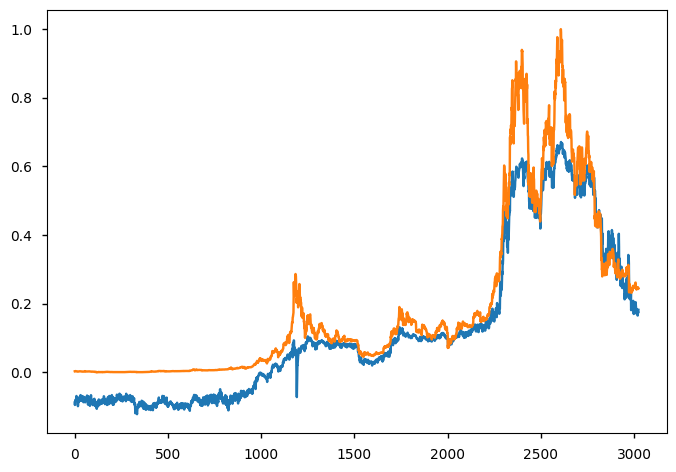

In [25]:
plt.plot(np.concatenate([model.predict(train_data),model.predict(test_data)]))
plt.plot(np.concatenate([train_target,test_target]))

## Full dimensionality - 5 and 10 days - LSTM

In [26]:
#5 days LSTM
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = None, shape_change = ((-1, 52), (-1,1,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_5d_shift.copy(), pipeline.data_5d_shift.copy().iloc[:,-1], 1, 5)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["Full dimensionality"],["BTC-LSTM - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-LSTM - 5 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = None, shape_change = ((-1, 52), (-1,1,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_10d_shift.copy(), pipeline.data_10d_shift.copy().iloc[:,-1], 1, 10)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["Full dimensionality"],["BTC-LSTM - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-LSTM - 10 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


# Retained 95% of variance

## Retained 95% of variance - Linear Regression

In [27]:
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.95))),
                ('scaler 2', StandardScaler()), ('pack_up,', None),
                ('estimator', Ridge(random_state=42))])

In [28]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["BTC-LR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-LR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


In [29]:
#5 days LR
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["BTC-LR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-LR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days LR
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["BTC-LR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-LR - 10 days"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/li

## Retained 95% of variance - Support Vector Regression

In [30]:
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.95))),
                ('scaler 2', StandardScaler()), ('pack_up,', None),
                ('estimator', LinearSVR(random_state=42))])

In [31]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["BTC-SVR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-SVR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

## Retained 95% of variance - 5 and 10 days - SVR

In [32]:
#5 days SVR
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["BTC-SVR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-SVR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days SVR
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["BTC-SVR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-SVR - 10 days"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

## Retained 95% of variance - LSTM

In [33]:
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
pipe

Pipeline(steps=[('pack_down', ReshapeTransformer(new_shape=(-1, 52))),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.95))),
                ('scaler 2', StandardScaler()),
                ('pack_up,', ReshapeTransformer(new_shape=(-1, 1, 52))),
                ('estimator',
                 KerasRegressor(batch_size=70, build_fn=<function Pipeline.assembly_lstm at 0x7fd6af115260>, epochs=500, input_shape=(1, 52), random_state=42, shuffle=False, units=2000, verbose=0))])

In [34]:
results_test

BTC-LR - 1 day BTC-LR - 5 days BTC-LR - 10 days  \
Full dimensionality       960.371278      2392.04922      3765.643891   
95% retained variance    6389.795421     7910.647028      7980.389921   
98% retained variance            NaN             NaN              NaN   
99% retained variance            NaN             NaN              NaN   

                      BTC-SVR - 1 day BTC-SVR - 5 days BTC-SVR - 10 days  \
Full dimensionality        973.251758      2375.766866       3187.232878   
95% retained variance      7532.51343      8166.138931       9012.446084   
98% retained variance             NaN              NaN               NaN   
99% retained variance             NaN              NaN               NaN   

                      BTC-LSTM - 1 day BTC-LSTM - 5 days BTC-LSTM - 10 days  
Full dimensionality        3332.288921       9794.555404        7699.674445  
95% retained variance              NaN               NaN                NaN  
98% retained variance              NaN               NaN                NaN  
99% retained variance              NaN               NaN                NaN

In [35]:
x,y = Pipeline.create_lstm_input(pipeline.data_1d_shift.copy(), pipeline.data_1d_shift.copy().iloc[:,-1], 1, 1)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["95% retained variance"],["BTC-LSTM - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-LSTM - 1 day"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


## Retained 95% of variance - 5 and 10 days - LSTM

In [36]:
#5 days LSTM
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_5d_shift.copy(), pipeline.data_5d_shift.copy().iloc[:,-1], 1, 5)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["95% retained variance"],["BTC-LSTM - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-LSTM - 5 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))
#10 days LSTM
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_10d_shift.copy(), pipeline.data_10d_shift.copy().iloc[:,-1], 1, 10)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["95% retained variance"],["BTC-LSTM - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-LSTM - 10 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


# Retained 98% of variance

## Retained 98% of variance - Linear Regression

In [37]:
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.98))),
                ('scaler 2', StandardScaler()), ('pack_up,', None),
                ('estimator', Ridge(random_state=42))])

In [38]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_1d_shift)
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["BTC-LR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-LR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


In [39]:
#5 days LR
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["BTC-LR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-LR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days LR
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["BTC-LR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-LR - 10 days"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/li

## Retained 98% of variance - Support Vector Regression

In [40]:
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.98))),
                ('scaler 2', StandardScaler()), ('pack_up,', None),
                ('estimator', LinearSVR(random_state=42))])

In [41]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["BTC-SVR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-SVR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

## Retained 98% of variance - 5 and 10 days - SVR

In [42]:
#5 days SVR
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["BTC-SVR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-SVR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days SVR
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["BTC-SVR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-SVR - 10 days"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

## Retained 98% of variance - LSTM

In [43]:
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
pipe

Pipeline(steps=[('pack_down', ReshapeTransformer(new_shape=(-1, 52))),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.98))),
                ('scaler 2', StandardScaler()),
                ('pack_up,', ReshapeTransformer(new_shape=(-1, 1, 52))),
                ('estimator',
                 KerasRegressor(batch_size=70, build_fn=<function Pipeline.assembly_lstm at 0x7fd6af115260>, epochs=500, input_shape=(1, 52), random_state=42, shuffle=False, units=2000, verbose=0))])

In [58]:
x,y = Pipeline.create_lstm_input(pipeline.data_1d_shift.copy(), pipeline.data_1d_shift.copy().iloc[:,-1], 1, 1)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["98% retained variance"],["BTC-LSTM - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-LSTM - 1 day"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


## Retained 98% of variance - 5 and 10 days - LSTM

In [59]:
#5 days LSTM
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_5d_shift.copy(), pipeline.data_5d_shift.copy().iloc[:,-1], 1, 5)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["98% retained variance"],["BTC-LSTM - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-LSTM - 5 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))
#10 days LSTM
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_10d_shift.copy(), pipeline.data_10d_shift.copy().iloc[:,-1], 1, 10)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["98% retained variance"],["BTC-LSTM - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-LSTM - 10 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


# Retained 99% of variance

## Retained 99% of variance - Linear Regression

In [60]:
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.99))),
                ('scaler 2', StandardScaler()), ('pack_up,', None),
                ('estimator', Ridge(random_state=42))])

In [61]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["BTC-LR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-LR - 1 day"]] = rmse(test_target,
                                                                prediction)

KeyboardInterrupt: 

In [ ]:
#5 days LR
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["BTC-LR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-LR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days LR
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["BTC-LR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-LR - 10 days"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/li

## Retained 99% of variance - Support Vector Regression

In [ ]:
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.99))),
                ('scaler 2', StandardScaler()), ('pack_up,', None),
                ('estimator', LinearSVR(random_state=42))])

In [ ]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["BTC-SVR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-SVR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

In [ ]:
#5 days SVR
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_5d_shift.copy())
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["BTC-SVR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-SVR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days SVR
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_10d_shift.copy())
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["BTC-SVR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-SVR - 10 days"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

/tmp/ipykernel_123434/2488864839.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


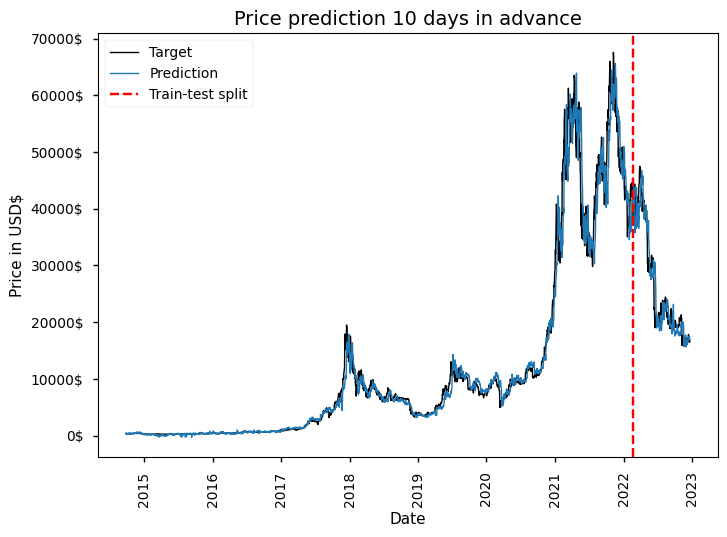

In [ ]:
test_prediction = pd.Series(prediction, index=test_data.index)
train_pred = pd.Series(model.predict(train_data), index=train_data.index)
visualizer = Visualizer()
fig = visualizer.draw_prediction_full(train_target,train_pred, test_target, test_prediction, 10)
fig.show()

## Retained 99% of variance - LSTM

In [62]:
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
pipe

Pipeline(steps=[('pack_down', ReshapeTransformer(new_shape=(-1, 52))),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.99))),
                ('scaler 2', StandardScaler()),
                ('pack_up,', ReshapeTransformer(new_shape=(-1, 1, 52))),
                ('estimator',
                 KerasRegressor(batch_size=70, build_fn=<function Pipeline.assembly_lstm at 0x7fd6af115260>, epochs=500, input_shape=(1, 52), random_state=42, shuffle=False, units=2000, verbose=0))])

In [63]:
x,y = Pipeline.create_lstm_input(pipeline.data_1d_shift.copy(), pipeline.data_1d_shift.copy().iloc[:,-1], 1, 1)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["99% retained variance"],["BTC-LSTM - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-LSTM - 1 day"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [64]:
#5 days LSTM
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_5d_shift.copy(), pipeline.data_5d_shift.copy().iloc[:,-1], 1, 5)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["99% retained variance"],["BTC-LSTM - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-LSTM - 5 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))
#10 days LSTM
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_10d_shift.copy(), pipeline.data_10d_shift.copy().iloc[:,-1], 1, 10)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["99% retained variance"],["BTC-LSTM - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-LSTM - 10 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [66]:
results_test.to_latex()

'\\begin{tabular}{llllllllll}\n\\toprule\n & BTC-LR - 1 day & BTC-LR - 5 days & BTC-LR - 10 days & BTC-SVR - 1 day & BTC-SVR - 5 days & BTC-SVR - 10 days & BTC-LSTM - 1 day & BTC-LSTM - 5 days & BTC-LSTM - 10 days \\\\\n\\midrule\nFull dimensionality & 960.371278 & 2392.049220 & 3765.643891 & 973.251758 & 2375.766866 & 3187.232878 & 3332.288921 & 9794.555404 & 7699.674445 \\\\\n95% retained variance & 6389.795421 & 7910.647028 & 7980.389921 & 7532.513430 & 8166.138931 & 9012.446084 & 3973.081433 & 6470.901623 & 5104.512285 \\\\\n98% retained variance & 1330.381121 & 2103.339885 & 2951.848360 & 1042.126694 & 2271.570061 & 3015.309334 & 8064.320295 & 6337.241829 & 7822.954520 \\\\\n99% retained variance & 978.447494 & 2153.450254 & 3124.302129 & 1078.080624 & 2167.767591 & 2823.602125 & 8064.320295 & 6503.330921 & 8751.874663 \\\\\n\\bottomrule\n\\end{tabular}\n'